<style type="text/css">
.reveal h1 { 
    font-size: 2em;
}
</style>

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 2: Supervised Machine Learning

### Applied Machine Learning

__Volodymyr Kuleshov__, lecture given by __Brandon Amos__<br>Cornell Tech

# Announcements

* Tutorials are finishing this week
* Homework 0 is out on Gradescope
* Homework 1 will be released today

# Recall: Supervised Learning

The most common approach to machine learning is supervised learning.

<center><img width=70% src="img/tesla_data.png"/></center>

1. First, we collect a dataset of labeled training examples.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

# Part 1: An Example of a Supervised Machine Learning Problem

Let’s start by dissecting a simple example of a supervised learning problem.

# A Recipe for Applying Supervised Learning

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# A Supervised Learning Dataset

Let’s start with a simple example of a supervised learning problem: predicting diabetes risk.

We start with a dataset of diabetes patients. 
* __Input:__ For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* __Ouput:__ We are interested in understanding how BMI affects an individual's diabetes risk.

In [1]:
import numpy as np
import pandas as pd; pd.options.display.float_format = "{:,.2f}".format
from sklearn import datasets

# We will use the UCI Diabetes Dataset
# It's a toy dataset often used to demo ML algorithms.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.34,233.00
423,23.81,91.00
424,25.33,111.00
425,23.78,152.00
426,23.97,120.00


We can also visualize this two-dimensional dataset.

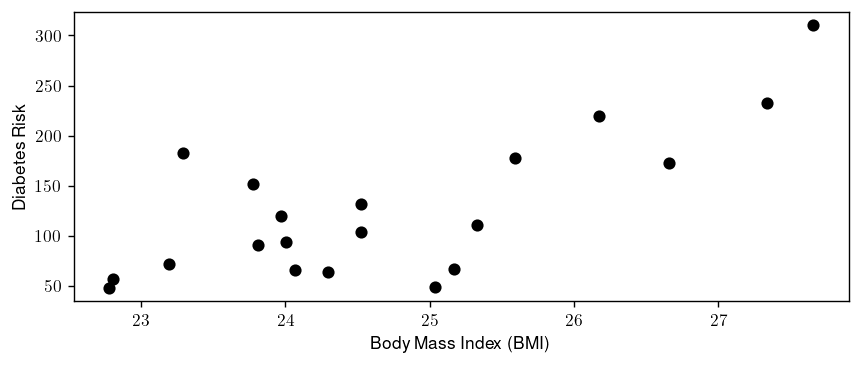

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({ "figure.figsize": [8, 3], "figure.dpi": 125, "text.usetex": True, "font.family": "Helvetica" })

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk');

# The Model Family

Let's assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

The parameters $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$.

We can visualize this for a few values of $\theta_1, \theta_0$.

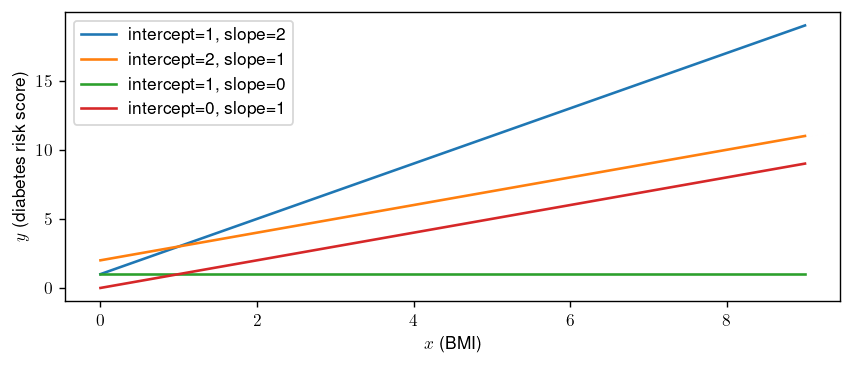

In [3]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y, label=f'intercept={theta0}, slope={theta1}')
plt.xlabel('$x$ (BMI)'); plt.ylabel('$y$ (diabetes risk score)'); plt.legend();

# A Supervised Learning Algorithm: The Optimizer

Given our assumption that $x,y$ follow a linear relationship, the goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.

This is an optimization problem.

For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print(f'Slope (theta1): {regr.coef_[0]:.2f}')
print(f'Intercept (theta0): {regr.intercept_:.2f}')

Slope (theta1): 37.38
Intercept (theta0): -797.08


# A Supervised Learning Model (over scalar data)

The supervised learning algorithm gave us a pair of parameters $\theta_1^*, \theta_0^*$. These define the *predictive model* $f^*$, defined as
$$ f(x) = \theta_1^* \cdot x + \theta_0^*, $$
where again $x$ is the BMI, and $y$ is the diabetes risk score.

We can visualize the linear model that best fits our data.

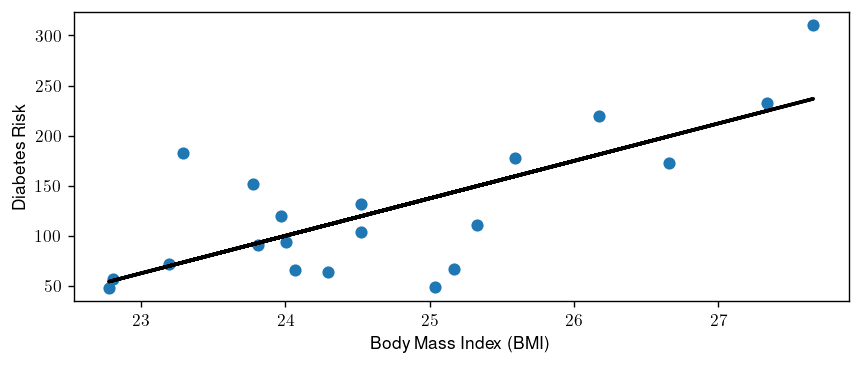

In [5]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2);

# Making New Predictions

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.

Given an $x_\text{new}$, we can output prediction $y_\text{new}$ as
$$ y_\text{new} = f(x_\text{new}) = \theta_1^* \cdot x_\text{new} + \theta_0. $$

Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

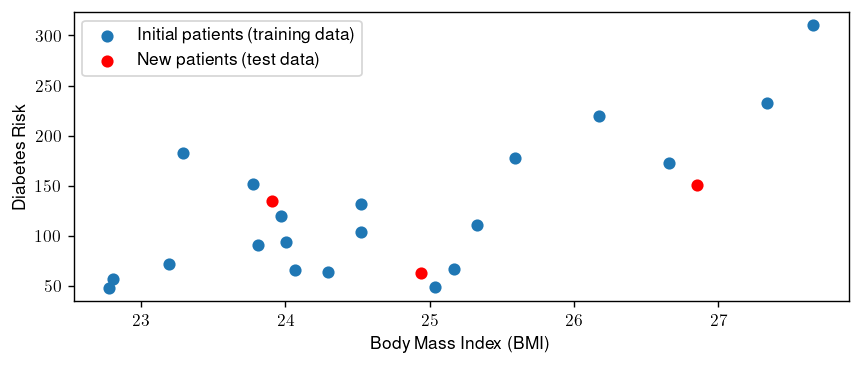

In [6]:
# Collect 3 data points
test_indices = [0,4,7]
diabetes_X_test = diabetes_X.iloc[test_indices]
diabetes_y_test = diabetes_y.iloc[test_indices]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)'); plt.ylabel('Diabetes Risk'); plt.legend(['Initial patients (training data)', 'New patients (test data)']);

Our linear model provides an estimate of the diabetes risk for these patients.

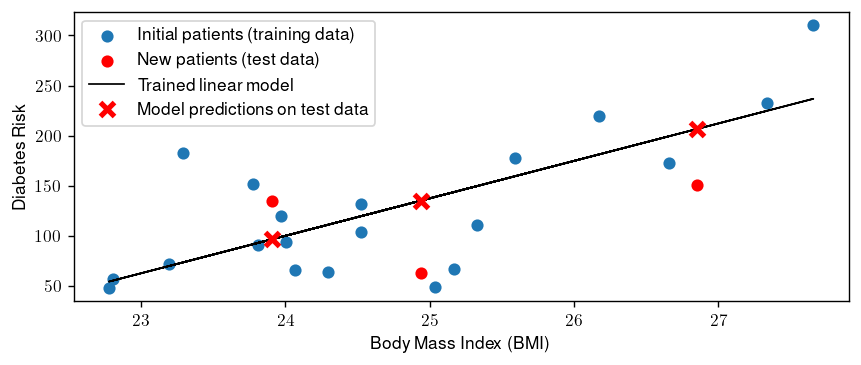

In [7]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Initial patients (training data)', 'New patients (test data)',
            "Trained linear model", "Model predictions on test data"]);

# Applications of Supervised Learning

Many of the most important applications of machine learning are supervised:
* Classifying medical images.
* Translating between pairs of languages.
* Detecting objects in a self-driving car.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Anatomy of a Supervised Learning Problem: The Dataset

We have seen an example of supervised machine learning for making predictions
from a scalar value (the BMI).

Let's now examine more closely the components of a supervised learning problem, starting with the dataset.

# Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# A Supervised Learning Dataset

Let's dive deeper into what's a supervised learning dataset. 

We will again use the UCI Diabetes Dataset as our example.

The UCI dataset contains many additional data columns besides `bmi`, including age, sex, and blood pressure. We can ask `sklearn` to give us more information about this dataset.

In [8]:
# Load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# A Supervised Learning Dataset: Notation

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

We can look at the diabetes dataset in this form.

In [9]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05


# Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient.

In [10]:
diabetes_X.iloc[0]

age    0.04
sex    0.05
bmi    0.06
bp     0.02
s1    -0.04
s2    -0.03
s3    -0.04
s4    -0.00
s5     0.02
s6    -0.02
Name: 0, dtype: float64

# Training Dataset: Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

# Training Dataset: Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

Let's create an "old man" feature.

In [11]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,False
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,False
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,True
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,False
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,False


# Training Dataset: Features

We may denote features via a function $\phi : \mathcal{X} \to \mathbb{R}^p$ that takes an input $x^{(i)} \in \mathcal{X}$ and outputs a $p$-dimensional vector
$$ \phi(x^{(i)}) = \left[\begin{array}{@{}c@{}}
\phi(x^{(i)})_1 \\
\phi(x^{(i)})_2 \\
\vdots \\
\phi(x^{(i)})_p
\end{array} \right]$$
We say that $\phi(x^{(i)})$ is a *featurized* input, and each $\phi(x^{(i)})_j$ is a *feature*.

# Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features. 

We will follow this convention and use the term "attribute" only when there is ambiguity between features and attributes.

# Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see that some ML algorthims handle these differently.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

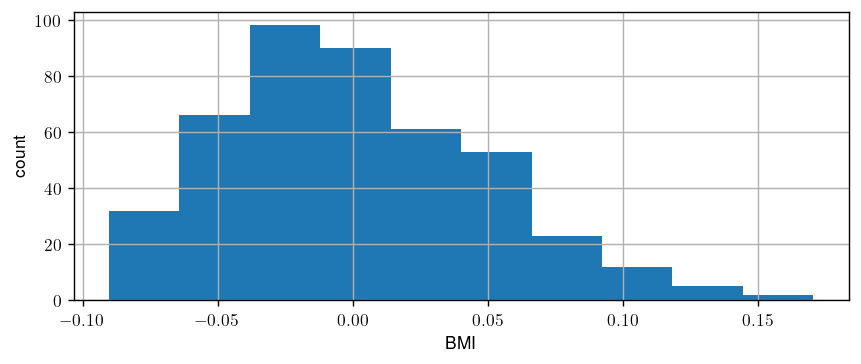

In [12]:
diabetes_X.loc[:, 'bmi'].hist()
plt.xlabel('BMI'); plt.ylabel('count');

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


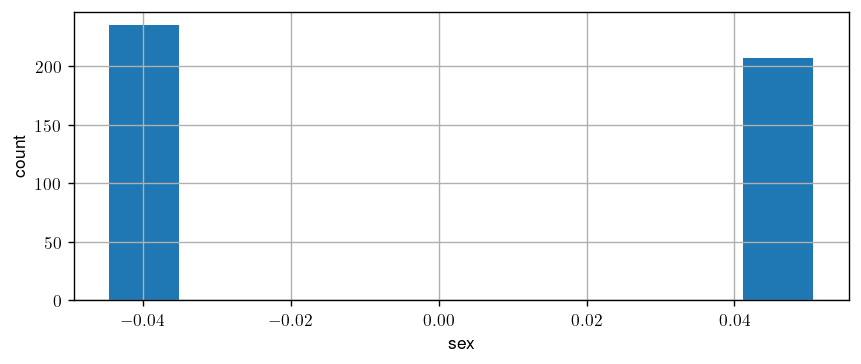

In [13]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()
plt.xlabel('sex'); plt.ylabel('count');

# Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

We plot the distirbution of risk scores below.

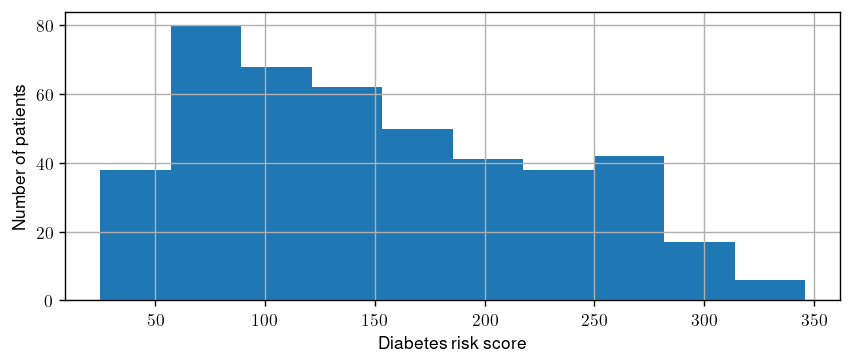

In [14]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist();

# Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Anatomy of a Supervised Learning Problem: The Learning Algorithm

Let's now look at what a general supervised learning algorithm looks like.

# Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# The Components of a Supervised Machine Learning Algorithm

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

Let's look again at our diabetes dataset for an example.

In [15]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05


# Model: Notation

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that it's parametrized by $\theta$.

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid \theta \in \Theta \}.$$

# Model Class: Example with vector-valued features

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x$ is a featurized input and $y$ is the target.

The $\theta_j$ are the *parameters* of the model, $\Theta = \mathbb{R}^{d+1}$, and $\mathcal{M} = \{ \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d \mid \theta \in \mathbb{R}^{d+1} \}$
<!-- By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features. -->

# Objectives: Notation

<!-- Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$. -->

To capture this intuition, we define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

 <span style="color:grey;">Error-based objective functions for regression are typically lower-bounded by 0, but in general may take any real value.</span>

# Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

Mean squared error: 4.00
Mean absolute error: 2.00


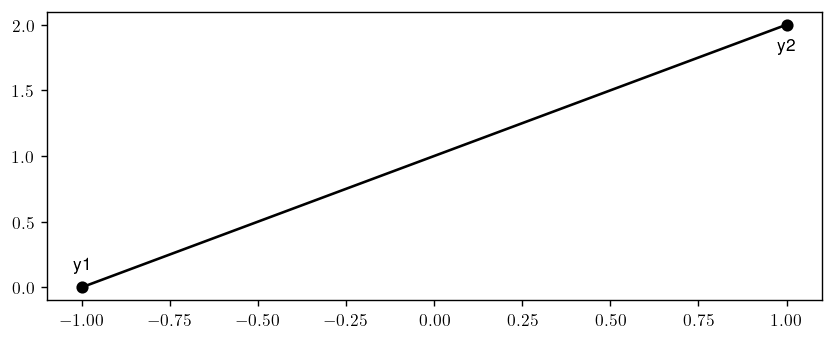

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([-1, 0])
y2 = np.array([1, 2])

plt.scatter(*y1, color='k')
plt.scatter(*y2, color='k')
plt.plot([y1[0], y2[0]], [y1[1], y2[1]], color='k')
plt.annotate('y1', (y1[0], y1[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('y2', (y2[0], y2[1]), textcoords="offset points", xytext=(0,-15), ha='center')

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

# Optimizer: Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

# Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

Let's use `sklearn` to fit a linear model with the MSE loss to our diabetes dataset, which now takes multi-dimensional features instead of just the scalar-valued BMI.

In [17]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[test_indices]
diabetes_y_test = diabetes_y.iloc[test_indices]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

The algorithm returns a predictive model.
Our model now takes all of the features as the input instead of just the BMI and is more difficult to visualize. There is more on visualizing high-dimensional later in the semester. For now, we can simply again look at the BMI part of the data (even though the model uses more information)

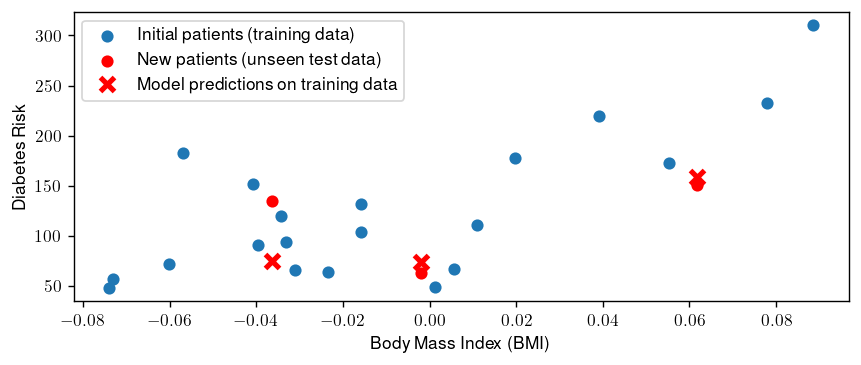

In [18]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
l = plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Initial patients (training data)', 'New patients (unseen test data)',
            "Model predictions on training data", "Model predictions on test data"]);

In [19]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1144.24
Test set mean squared error: 1259.97
Test set mean squared error on random inputs: 15060.85


# Summary: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

**Next class:** implementing and optimizing regression models ourselves without `sklearn`